In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_list = []
for year in range(2010, 2021):
    data = pd.read_csv(f'../../data/D02.birdwave_peak/spring_max_birdwave_day_all_{year}_10_40_20_50.csv')
    data['year'] = year
    data_list.append(data)
    
data = pd.concat(data_list, axis=0).reset_index(drop=True)
del data_list
    

In [4]:
data


,h3_02,mean_DOY_max,std_DOY_max,mean_DOY_peak,std_DOY_peak,lng,lat,year
0,820007fffffffff,NaN,NaN,NaN,NaN,38.027955,79.251775,2010
1,820027fffffffff,NaN,NaN,NaN,NaN,29.600681,77.193999,2010
2,82002ffffffffff,NaN,NaN,NaN,NaN,22.595539,79.658404,2010
3,82006ffffffffff,NaN,NaN,NaN,NaN,-24.512415,81.910253,2010
4,820127fffffffff,NaN,NaN,NaN,NaN,24.357445,70.694569,2010
...,...,...,...,...,...,...,...,...
22176,82ef0ffffffffff,NaN,NaN,NaN,NaN,-52.513527,-79.844379,2020
22177,82ef47fffffffff,31.709677,51.857621,29.818182,5.844967,-67.093519,-75.441394,2020
22178,82ef4ffffffffff,24.067568,34.860713,32.545455,4.687646,-66.830724,-72.358599,2020
22179,82ef5ffffffffff,30.805556,55.562484,30.333333,3.141125,-57.402121,-73.726350,2020


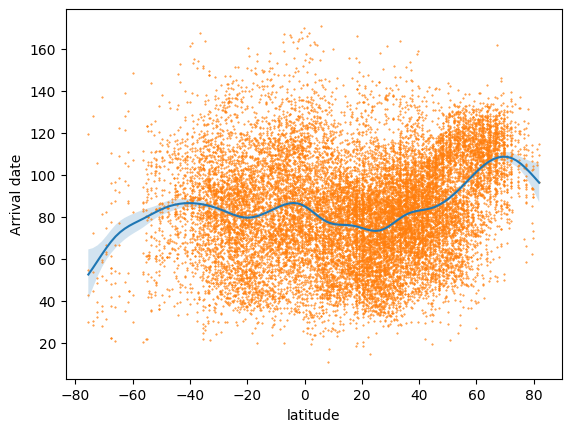

In [32]:
from pygam import s,f, LinearGAM
tmp = data.dropna(subset=['lat','mean_DOY_peak'])
model = LinearGAM(s(0)).fit(tmp['lat'], tmp['mean_DOY_peak'])
XX = model.generate_X_grid(term=0)
pred = model.predict(XX)
CI = model.confidence_intervals(XX)

plt.plot(XX, pred)
plt.fill_between(XX[:,0], CI[:,0], CI[:,1],alpha=0.2)
plt.scatter(
    x=data['lat'], y=data['mean_DOY_peak'], s=0.2
)

plt.xlabel('latitude')
plt.ylabel('Arrival date')
plt.show()

# sns.regplot(
#     x=data['lat'], y=data['mean_DOY_peak'],scatter_kws={'s':0.2, 'alpha':0.2}
# )
# plt.show()


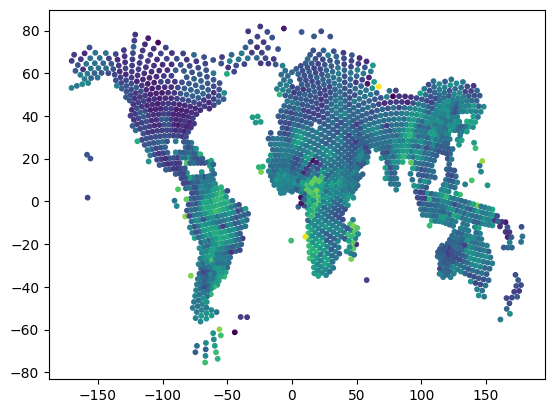

/beegfs/store4/chenyangkang/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


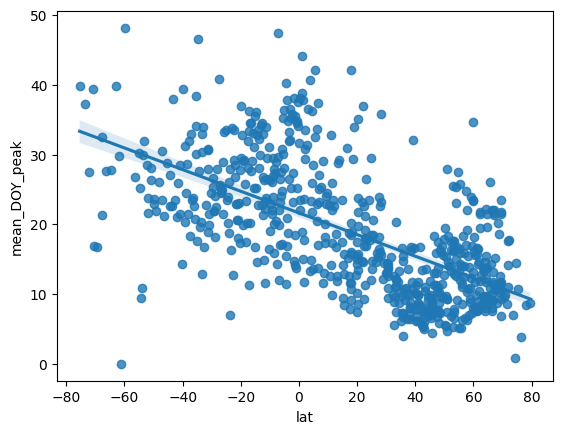

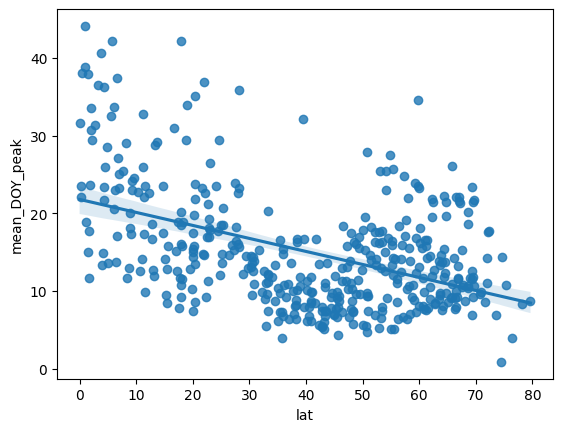

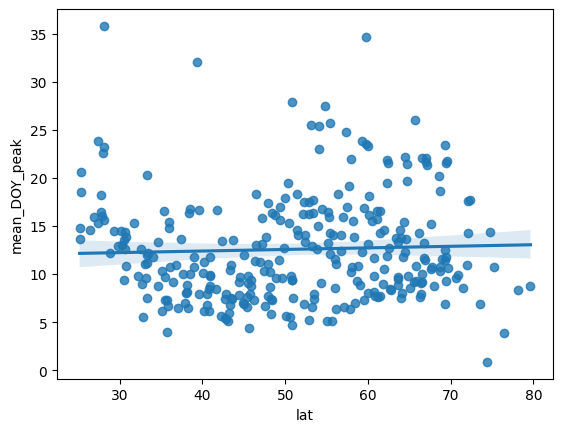

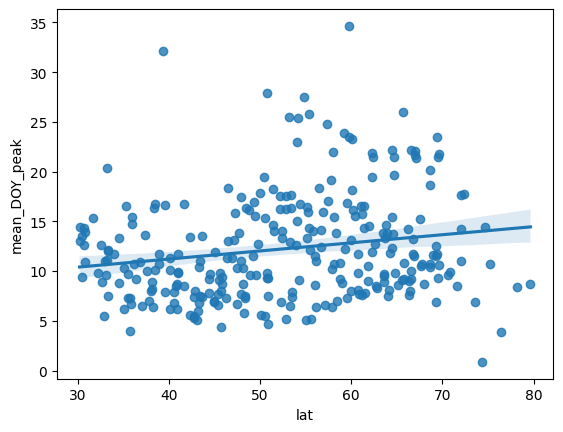

In [36]:
tmp = data.groupby(['h3_02','lng','lat'])['mean_DOY_peak'].std().reset_index(drop=False)
plt.scatter(
    tmp['lng'], tmp['lat'], c=tmp['mean_DOY_peak'],s=10
)
plt.show()

import seaborn as sns
sns.regplot(
    tmp[(tmp['lng']<=-30)]['lat'], tmp[(tmp['lng']<=-30)]['mean_DOY_peak']
)
plt.show()

import seaborn as sns
sns.regplot(
    tmp[(tmp['lat']>=0) & (tmp['lng']<=-30)]['lat'], tmp[(tmp['lat']>=0) & (tmp['lng']<=-30)]['mean_DOY_peak']
)
plt.show()

import seaborn as sns
sns.regplot(
    tmp[(tmp['lat']>=25) & (tmp['lng']<=-30)]['lat'], tmp[(tmp['lat']>=25) & (tmp['lng']<=-30)]['mean_DOY_peak']
)
plt.show()

import seaborn as sns
sns.regplot(
    tmp[(tmp['lat']>=30) & (tmp['lng']<=-30)]['lat'], tmp[(tmp['lat']>=30) & (tmp['lng']<=-30)]['mean_DOY_peak']
)
plt.show()




<Axes: xlabel='lat', ylabel='mean_DOY_peak'>

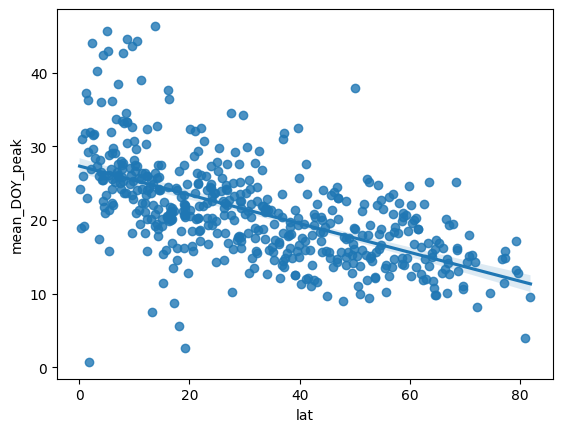

In [37]:
import seaborn as sns
sns.regplot(
    tmp[(tmp['lat']>=0) & (tmp['lng']>=-30) & (tmp['lng']<=50)]['lat'], tmp[(tmp['lat']>=0) & (tmp['lng']>=-30) & (tmp['lng']<=50)]['mean_DOY_peak']
)

<Axes: xlabel='lat', ylabel='mean_DOY_peak'>

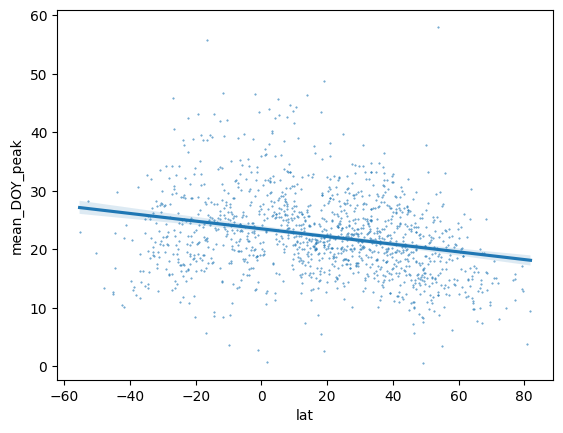

In [38]:
import seaborn as sns
sns.regplot(
    tmp[(tmp['lng']>=-30)]['lat'], tmp[(tmp['lng']>=-30)]['mean_DOY_peak'], scatter_kws={'s':0.2}
)


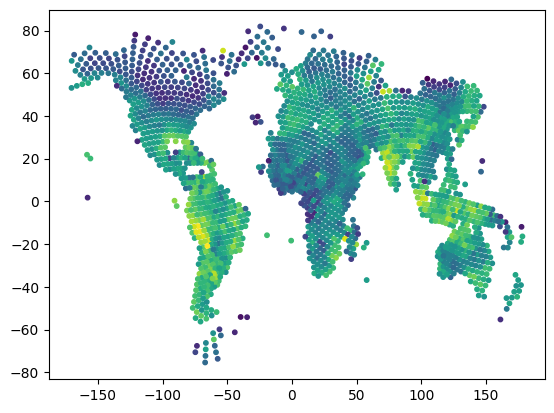

In [8]:
tmp = data.groupby(['h3_02','lng','lat'])['std_DOY_peak'].mean().reset_index(drop=False)
plt.scatter(
    tmp['lng'], tmp['lat'], c=tmp['std_DOY_peak'],s=10
)
plt.show()



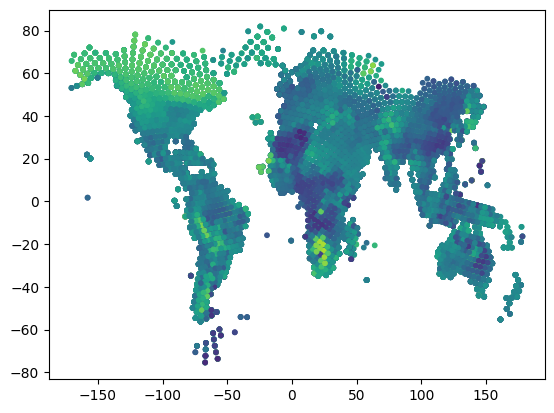

In [9]:
plt.scatter(
    data['lng'], data['lat'], c=data['mean_DOY_peak'],s=10
)
